# Exercise w/ PyTorch
### Author: Ho Kyung Sung

#### Assignment spec:
(i) Generate a dataset as follows: sample 10000 points from N(0, 1) as inputs (x). Define outputs (y) as y = 5x^3 + 10. Reserve 80% of the dataset for training and save 20% for evaluation.

(ii) train a linear regression model (built in PyTorch!) using gradient descent on the training dataset. Evaluate on the reserved 20%. How does your model perform on training and evaluation data? (compute the mean squared error between predicted y and true y). 

(iii) Add more layers and some nonlinearities to your linear regression model (nn.TanH lets say). Compute training and evaluation performance again. What happens?

In [271]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [272]:
# Function for printing evaluation stats
def print_result(x_eval, y_eval, model):
    predicted = model.forward(torch.from_numpy(x_eval).unsqueeze(1)).data.numpy()

    y_eval = np.expand_dims(y_eval, 1)
    final_loss = np.mean(np.square(y_eval - predicted))
    final_loss2 = criterion(torch.from_numpy(predicted), torch.from_numpy(y_eval)).data.numpy()
    print(final_loss)
    print(final_loss2)
    
    plt.plot(x_eval, y_eval, 'o', label = 'from data', alpha = 0.5)
    plt.plot(x_eval, predicted, '--', label = 'prediction', alpha = 0.5)
    plt.legend()
    plt.show()
    print(model_ln.state_dict())

In [273]:
# (i) Generate dataset
n_data = 10000
training_cutoff = n_data * 4 // 5

mu, sigma = 0, 1
x = (sigma * np.random.randn(n_data) + mu).astype(np.float32)
y = 5*(x**3) + 10

In [274]:
# (ii) Train linear regression model
# Create linear regression model
class LinearRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        # Single linear layer
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        predict = self.linear(x)
        return predict

In [275]:
# Create instance of model
in_dim = 1
out_dim = 1
model_ln = LinearRegressionModel(in_dim, out_dim)

# Mean squared loss
criterion = torch.nn.MSELoss()
# define eta
l_rate = 0.01
# Training model is stochastic gradient descent
optimizer = torch.optim.SGD(model_ln.parameters(), lr = l_rate)

In [276]:
x_train = torch.from_numpy(x[:training_cutoff]).unsqueeze(1)
y_train = torch.from_numpy(y[:training_cutoff]).unsqueeze(1)

epochs = 300
for epoch in range(epochs):
    inputs = x_train
    labels = y_train

    optimizer.zero_grad()
    outputs = model_ln.forward(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()# back props
    
    # Q: how to stop after plateauing?
    
    # update the parameters
    optimizer.step()
    
    print('training epoch {}, loss {}'.format(epoch, loss.data))

training epoch 0, loss 503.769714355
training epoch 1, loss 489.519165039
training epoch 2, loss 475.8387146
training epoch 3, loss 462.705535889
training epoch 4, loss 450.097808838
training epoch 5, loss 437.994415283
training epoch 6, loss 426.375274658
training epoch 7, loss 415.220947266
training epoch 8, loss 404.5128479
training epoch 9, loss 394.233154297
training epoch 10, loss 384.364715576
training epoch 11, loss 374.891052246
training epoch 12, loss 365.796417236
training epoch 13, loss 357.065582275
training epoch 14, loss 348.684051514
training epoch 15, loss 340.6378479
training epoch 16, loss 332.913513184
training epoch 17, loss 325.49822998
training epoch 18, loss 318.379577637
training epoch 19, loss 311.545715332
training epoch 20, loss 304.985229492
training epoch 21, loss 298.687225342
training epoch 22, loss 292.641174316
training epoch 23, loss 286.836975098
training epoch 24, loss 281.265014648
training epoch 25, loss 275.91595459
training epoch 26, loss 270.78

183.9948
183.9948


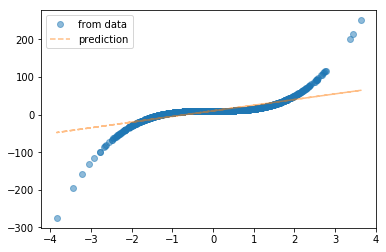

OrderedDict([('linear.weight', tensor([[15.0008]])), ('linear.bias', tensor([9.8922]))])


In [277]:
x_eval = x[training_cutoff:]
y_eval = y[training_cutoff:]
print_result(x_eval, y_eval, model_ln)

In [285]:
# iii) Add non-linear layers (nn.TanH)
# Create linear regression model
class NeuralRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralRegressionModel, self).__init__() 
        # Single linear layer
        self.hidden = torch.nn.Linear(input_dim, hidden_dim)    # hidden layer
        self.tanH = torch.nn.Hardtanh()                         # non-linear layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)   # linear output layer
        

    def forward(self, x):
        x = self.hidden(x)
        x = self.tanH(x)               # activation function for hidden layer
        x = self.linear(x)             # linear output
        return x

In [289]:
# Create instance of model
model_tanH = NeuralRegressionModel(input_dim=1, hidden_dim=100, output_dim=1)

# Mean squared loss
criterion = torch.nn.MSELoss()
# define eta
l_rate = 0.01
# Training model is stochastic gradient descent
optimizer = torch.optim.SGD(model_tanH.parameters(), lr = l_rate)

In [290]:
epochs = 2000
for epoch in range(epochs):
    inputs = x_train
    labels = y_train

    optimizer.zero_grad()
    outputs = model_tanH.forward(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()# back props
    
    # Q: how to stop after plateauing?
    
    # update the parameters
    optimizer.step()
    
    print('training epoch {}, loss {}'.format(epoch, loss.data))

training epoch 0, loss 475.772003174
training epoch 1, loss 309.639099121
training epoch 2, loss 246.781311035
training epoch 3, loss 221.031967163
training epoch 4, loss 209.726318359
training epoch 5, loss 203.706726074
training epoch 6, loss 199.539260864
training epoch 7, loss 196.019195557
training epoch 8, loss 192.760604858
training epoch 9, loss 189.646560669
training epoch 10, loss 186.657363892
training epoch 11, loss 183.791610718
training epoch 12, loss 181.041915894
training epoch 13, loss 178.405273438
training epoch 14, loss 175.868484497
training epoch 15, loss 173.412948608
training epoch 16, loss 171.029144287
training epoch 17, loss 168.711807251
training epoch 18, loss 166.46043396
training epoch 19, loss 164.274124146
training epoch 20, loss 162.143585205
training epoch 21, loss 160.065811157
training epoch 22, loss 158.037033081
training epoch 23, loss 156.057876587
training epoch 24, loss 154.12701416
training epoch 25, loss 152.253509521
training epoch 26, loss 

training epoch 236, loss 23.3983612061
training epoch 237, loss 23.2887840271
training epoch 238, loss 23.1810131073
training epoch 239, loss 23.0740356445
training epoch 240, loss 22.968328476
training epoch 241, loss 22.8634815216
training epoch 242, loss 22.7596645355
training epoch 243, loss 22.6571826935
training epoch 244, loss 22.5556735992
training epoch 245, loss 22.4553642273
training epoch 246, loss 22.3557758331
training epoch 247, loss 22.257358551
training epoch 248, loss 22.159160614
training epoch 249, loss 22.0621891022
training epoch 250, loss 21.9662380219
training epoch 251, loss 21.8715076447
training epoch 252, loss 21.7775936127
training epoch 253, loss 21.6847381592
training epoch 254, loss 21.5928535461
training epoch 255, loss 21.5016460419
training epoch 256, loss 21.4115409851
training epoch 257, loss 21.3232631683
training epoch 258, loss 21.2343597412
training epoch 259, loss 21.1469230652
training epoch 260, loss 21.059545517
training epoch 261, loss 20.9

training epoch 480, loss 23.3208332062
training epoch 481, loss 24.1563835144
training epoch 482, loss 25.1465167999
training epoch 483, loss 25.8579769135
training epoch 484, loss 26.7137050629
training epoch 485, loss 27.1692466736
training epoch 486, loss 27.781955719
training epoch 487, loss 27.9176197052
training epoch 488, loss 28.1948318481
training epoch 489, loss 27.9724597931
training epoch 490, loss 27.8634414673
training epoch 491, loss 27.2885875702
training epoch 492, loss 26.8344688416
training epoch 493, loss 25.9981422424
training epoch 494, loss 25.2895412445
training epoch 495, loss 24.3067588806
training epoch 496, loss 23.4167881012
training epoch 497, loss 22.4039783478
training epoch 498, loss 21.4751548767
training epoch 499, loss 20.5274753571
training epoch 500, loss 19.653875351
training epoch 501, loss 18.8197937012
training epoch 502, loss 18.0404891968
training epoch 503, loss 17.3427867889
training epoch 504, loss 16.6779346466
training epoch 505, loss 16

training epoch 724, loss 11.0609674454
training epoch 725, loss 10.9725151062
training epoch 726, loss 10.895699501
training epoch 727, loss 10.8138360977
training epoch 728, loss 10.7443256378
training epoch 729, loss 10.6817092896
training epoch 730, loss 10.6266918182
training epoch 731, loss 10.5755901337
training epoch 732, loss 10.5278530121
training epoch 733, loss 10.4891958237
training epoch 734, loss 10.4484825134
training epoch 735, loss 10.4208698273
training epoch 736, loss 10.392036438
training epoch 737, loss 10.3975772858
training epoch 738, loss 10.3825006485
training epoch 739, loss 10.3939437866
training epoch 740, loss 10.3867053986
training epoch 741, loss 10.4291210175
training epoch 742, loss 10.4292869568
training epoch 743, loss 10.4761800766
training epoch 744, loss 10.4812040329
training epoch 745, loss 10.5341053009
training epoch 746, loss 10.5499515533
training epoch 747, loss 10.6082468033
training epoch 748, loss 10.6285114288
training epoch 749, loss 10

training epoch 968, loss 10.0330753326
training epoch 969, loss 10.0165777206
training epoch 970, loss 9.99573612213
training epoch 971, loss 9.99389743805
training epoch 972, loss 9.98174571991
training epoch 973, loss 9.97929286957
training epoch 974, loss 9.96346759796
training epoch 975, loss 9.95693397522
training epoch 976, loss 9.93611812592
training epoch 977, loss 9.94282054901
training epoch 978, loss 9.92552185059
training epoch 979, loss 9.93421554565
training epoch 980, loss 9.92007732391
training epoch 981, loss 9.91168403625
training epoch 982, loss 9.89282608032
training epoch 983, loss 9.89048862457
training epoch 984, loss 9.87425327301
training epoch 985, loss 9.87870788574
training epoch 986, loss 9.8589925766
training epoch 987, loss 9.84576034546
training epoch 988, loss 9.82663440704
training epoch 989, loss 9.82581138611
training epoch 990, loss 9.80907440186
training epoch 991, loss 9.80475330353
training epoch 992, loss 9.78791713715
training epoch 993, loss 9

training epoch 1206, loss 8.46878528595
training epoch 1207, loss 8.46542167664
training epoch 1208, loss 8.45451164246
training epoch 1209, loss 8.45400333405
training epoch 1210, loss 8.44086360931
training epoch 1211, loss 8.43324375153
training epoch 1212, loss 8.42551326752
training epoch 1213, loss 8.42789459229
training epoch 1214, loss 8.42108917236
training epoch 1215, loss 8.41596412659
training epoch 1216, loss 8.40796947479
training epoch 1217, loss 8.41452980042
training epoch 1218, loss 8.41004180908
training epoch 1219, loss 8.40944480896
training epoch 1220, loss 8.40375137329
training epoch 1221, loss 8.41021823883
training epoch 1222, loss 8.4053106308
training epoch 1223, loss 8.41658115387
training epoch 1224, loss 8.41396427155
training epoch 1225, loss 8.43139839172
training epoch 1226, loss 8.42537879944
training epoch 1227, loss 8.43080234528
training epoch 1228, loss 8.428814888
training epoch 1229, loss 8.43545818329
training epoch 1230, loss 8.42796707153
tra

training epoch 1441, loss 7.55638408661
training epoch 1442, loss 7.56226205826
training epoch 1443, loss 7.54562282562
training epoch 1444, loss 7.55482769012
training epoch 1445, loss 7.53583908081
training epoch 1446, loss 7.53578138351
training epoch 1447, loss 7.52166652679
training epoch 1448, loss 7.53447055817
training epoch 1449, loss 7.52249383926
training epoch 1450, loss 7.52589988708
training epoch 1451, loss 7.51493787766
training epoch 1452, loss 7.52445268631
training epoch 1453, loss 7.51929712296
training epoch 1454, loss 7.52518415451
training epoch 1455, loss 7.52060556412
training epoch 1456, loss 7.52674293518
training epoch 1457, loss 7.51824140549
training epoch 1458, loss 7.5286283493
training epoch 1459, loss 7.52875518799
training epoch 1460, loss 7.53450965881
training epoch 1461, loss 7.52718162537
training epoch 1462, loss 7.54070949554
training epoch 1463, loss 7.53877210617
training epoch 1464, loss 7.54073047638
training epoch 1465, loss 7.54160690308
t

training epoch 1679, loss 6.74049568176
training epoch 1680, loss 6.74572610855
training epoch 1681, loss 6.76391792297
training epoch 1682, loss 6.76958465576
training epoch 1683, loss 6.78165721893
training epoch 1684, loss 6.78367519379
training epoch 1685, loss 6.79116010666
training epoch 1686, loss 6.79560422897
training epoch 1687, loss 6.8076505661
training epoch 1688, loss 6.81158590317
training epoch 1689, loss 6.82268667221
training epoch 1690, loss 6.82489776611
training epoch 1691, loss 6.83252811432
training epoch 1692, loss 6.83445262909
training epoch 1693, loss 6.83629179001
training epoch 1694, loss 6.84088611603
training epoch 1695, loss 6.84856939316
training epoch 1696, loss 6.84862947464
training epoch 1697, loss 6.83563423157
training epoch 1698, loss 6.82869005203
training epoch 1699, loss 6.81109333038
training epoch 1700, loss 6.81199598312
training epoch 1701, loss 6.78494024277
training epoch 1702, loss 6.78507232666
training epoch 1703, loss 6.78624677658
t

training epoch 1916, loss 6.23630523682
training epoch 1917, loss 6.22231006622
training epoch 1918, loss 6.22210407257
training epoch 1919, loss 6.21638584137
training epoch 1920, loss 6.2178196907
training epoch 1921, loss 6.21541166306
training epoch 1922, loss 6.21447229385
training epoch 1923, loss 6.19783210754
training epoch 1924, loss 6.19983148575
training epoch 1925, loss 6.19071340561
training epoch 1926, loss 6.1934876442
training epoch 1927, loss 6.18416404724
training epoch 1928, loss 6.18520593643
training epoch 1929, loss 6.17029476166
training epoch 1930, loss 6.17134189606
training epoch 1931, loss 6.16950321198
training epoch 1932, loss 6.1726436615
training epoch 1933, loss 6.17215776443
training epoch 1934, loss 6.17195081711
training epoch 1935, loss 6.16822814941
training epoch 1936, loss 6.17353916168
training epoch 1937, loss 6.16989278793
training epoch 1938, loss 6.17062759399
training epoch 1939, loss 6.16844654083
training epoch 1940, loss 6.16729688644
tra

8.6475935
8.6475935


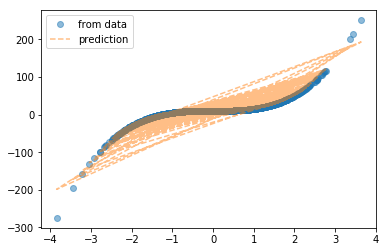

OrderedDict([('linear.weight', tensor([[15.0008]])), ('linear.bias', tensor([9.8922]))])


In [291]:
x_eval = x[training_cutoff:]
y_eval = y[training_cutoff:]
print_result(x_eval, y_eval, model_tanH)